In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import numpy as np

In [41]:
df= pd.read_csv("car_data.csv")
df

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
...,...,...,...,...,...
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1


In [42]:
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [43]:
df.shape

(1000, 5)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [45]:
df.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


In [46]:
df[(df.Gender == 'Male') & (df.AnnualSalary >= 50000) & (df.Purchased == 1)]

,User ID,Gender,Age,AnnualSalary,Purchased
3,895,Male,40,107500,1
18,926,Male,46,79000,1
26,20,Male,40,107000,1
27,108,Male,40,97500,1
38,121,Male,42,73000,1
...,...,...,...,...,...
960,1,Male,32,100000,1
965,962,Male,52,150000,1
969,721,Male,29,148000,1
972,440,Male,63,85500,1


In [47]:
gndr={"Male":0,"Female":1}
gndr

{'Male': 0, 'Female': 1}

In [48]:
age_mean_male=np.mean(df[df['Gender']==0]['Age'].values)
age_mean_fmale=np.mean(df[df['Gender']==1]['Age'].values)

In [49]:
df["Gender"]=df["Gender"].map(gndr)

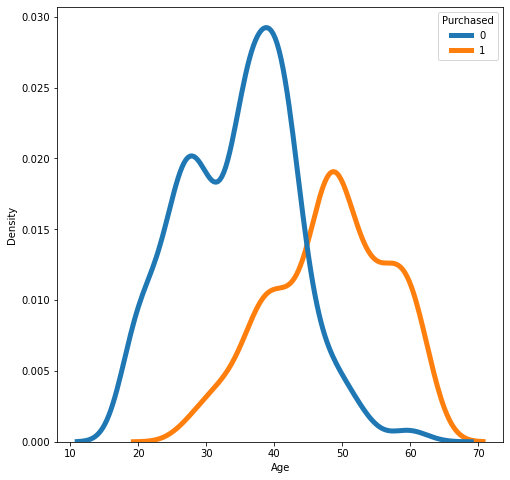

In [50]:
fig, ax = plt.subplots(figsize=(8,8))
sns.kdeplot(ax=ax, x=df['Age'],hue=df['Purchased'], linewidth=5)
ax.plot(age_mean_male,0,marker='o',markersize=10)
ax.plot(age_mean_fmale,0,marker='o',markersize=10)
# ax.plot(age_std,0,marker='o',markersize=115,markerfacecolor='green')

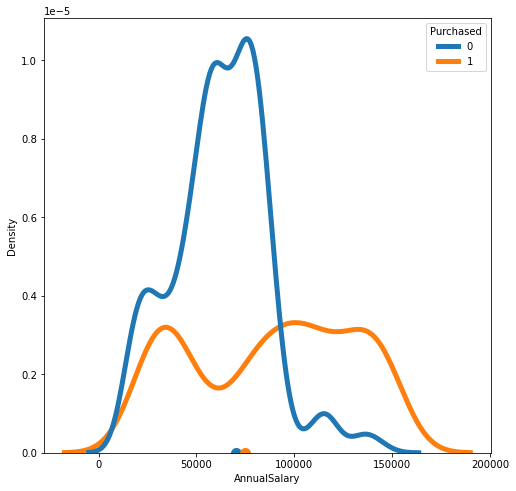

In [51]:
sal_mean_male=np.mean(df[df['Gender']==0]['AnnualSalary'].values)
sal_mean_fmale=np.mean(df[df['Gender']==1]['AnnualSalary'].values)
fig, ax = plt.subplots(figsize=(8,8))
sns.kdeplot(ax=ax, x=df['AnnualSalary'],hue=df['Purchased'], linewidth=5)
ax.plot(sal_mean_male,0,marker='o',markersize=10)
ax.plot(sal_mean_fmale,0,marker='o',markersize=10)

<AxesSubplot:xlabel='Gender', ylabel='count'>

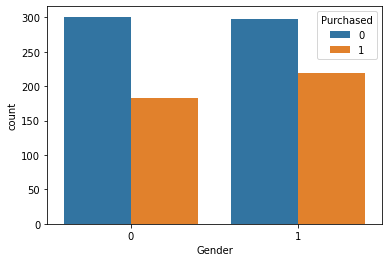

In [52]:
sns.countplot(df['Gender'],hue=df['Purchased'])

<AxesSubplot:xlabel='Purchased', ylabel='count'>

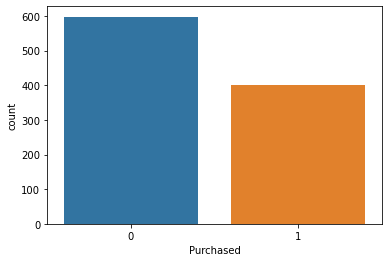

In [53]:
sns.countplot(df['Purchased'])

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scalar=StandardScaler()

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_=df.drop('User ID',axis=1)
X=X_.iloc[:,:-1]
y=df.iloc[:,-1]

In [58]:
X=scalar.fit_transform(X)

In [59]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
lr=LogisticRegression()

lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)

In [62]:
from sklearn.metrics import classification_report,confusion_matrix

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       189
           1       0.86      0.67      0.75       141

    accuracy                           0.81       330
   macro avg       0.82      0.79      0.80       330
weighted avg       0.82      0.81      0.81       330



In [64]:
confusion_matrix(y_test,y_pred)

array([[173,  16],
       [ 46,  95]], dtype=int64)

Text(0.5, 1.0, 'Confusion matrix')

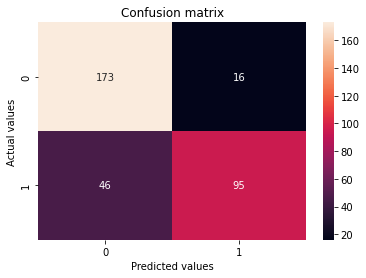

In [65]:
conf=confusion_matrix(y_test,y_pred)
conf=sns.heatmap(conf,annot=True,fmt='.4g')
conf.set_xlabel("Predicted values")
conf.set_ylabel("Actual values")
conf.set_title("Confusion matrix")